In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, 
                             precision_recall_curve, plot_precision_recall_curve, f1_score, average_precision_score, 
                             hinge_loss, precision_score, recall_score)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer, load_digits, fetch_openml, load_iris, make_moons, make_blobs
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from scipy import stats
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from imgaug import augmenters as iaa
warnings.filterwarnings('ignore')
%matplotlib inline

### 1. Prezentacja o SVM

Link do prezentacji: https://1drv.ms/p/s!Ap19wJ6OUb8YgYMBlXjB0sOhyxqi0Q

### 2. Przykład działania SVM dla zbiorów WBC (WBreast cancer), MNIST, FMNIST - 500 elementów

In [4]:
# WBC
cancer = load_breast_cancer()

cancer_zipped = list(zip(cancer.data, cancer.target))
cancer_random_sample = random.sample(cancer_zipped, 500)
X, Y = zip(*(cancer_random_sample))
X = np.asarray(X)
Y = np.asarray(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(f'accuracy score: {accuracy_score(y_test,y_pred)}')

accuracy score: 0.96


In [5]:
# MNIST
mnist = fetch_openml("mnist_784", data_home="./mnist_784", cache=True)

mnist_zipped = list(zip(mnist.data, mnist.target))
mnist_random_sample = random.sample(mnist_zipped, 1000)
X, Y = zip(*(mnist_random_sample))
X = np.asarray(X)
Y = np.asarray(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(f'accuracy score: {accuracy_score(y_test,y_pred)}')

accuracy score: 0.88


In [6]:
# FMNIST
fmnist = fetch_openml("Fashion-MNIST", data_home="./fmnist", cache=True)

fmnist_zipped = list(zip(fmnist.data, fmnist.target))
fmnist_random_sample = random.sample(fmnist_zipped, 400)
X, Y = zip(*(fmnist_random_sample))
X = np.asarray(X)
Y = np.asarray(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(f'accuracy score: {accuracy_score(y_test,y_pred)}')

accuracy score: 0.775


In [7]:
# Porównianie kerneli dla powyższych zbiorów. 

In [8]:
def accuracy(dataset, kernel):
    dataset_zipped = list(zip(dataset.data, dataset.target))
    dataset_random_sample = random.sample(dataset_zipped, 500)
    X, Y = zip(*(dataset_random_sample))
    X = np.asarray(X)
    Y = np.asarray(Y)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

    clf = SVC(kernel='linear')
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    
    return accuracy_score(y_test,y_pred)

In [9]:
frame_data = []

for kernel in ('linear', 'poly', 'rbf'):
    frame_data.append([kernel, accuracy(cancer, kernel), accuracy(mnist, kernel), accuracy(fmnist, kernel)])

                  
frame = pd.DataFrame(frame_data, columns=["kernel", "cancer", "mnist", "fmnist"])
frame

,kernel,cancer,mnist,fmnist
0,linear,0.96,0.82,0.84
1,poly,0.96,0.80,0.82
2,rbf,0.96,0.96,0.74


### 3. Krótkie ćwiczenie dla studentów, w którym należy dobrać odpowiednie parametry kernela i uczenia dla wybranych zbiorów danych

In [10]:
# Just util functions. Imagine it's not here :)

data_colors = [(1, 0, 0), (0, 0, 1), (1, 1, 0), (1, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 0), (1,0,0), (1,0,0), (1,0,0)]

def read_points_file(filename):
    pts = []
    with open(filename, "r") as f:
        for pt in f:
            pt = pt.strip("\n").split()
            pts.append([float(pt[0]), float(pt[1])])
    return pts


def read_data(class_0_file, class_1_file):
    pts_0 = read_points_file(class_0_file)
    pts_1 = read_points_file(class_1_file)

    x = pts_0 + pts_1
    labels = [0] * len(pts_0) + [1] * len(pts_1)
    x = np.array(x)
    return (x, labels)


def plot_data(X_train, y_train, X_test, y_test):

    X = np.concatenate((X_train, X_test))
    y = np.concatenate((y_train, y_test))

    colors = get_colors(y)
    colors_train = get_colors(y_train)
    colors_test = get_colors(y_test)


    plt.figure(figsize=(12, 4))

    # Plot all data plot
    plt.subplot(131)
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c = colors, s = 10, edgecolors=colors)
    plt.title("Data (100%)")

    # training data plot
    plt.subplot(132)
    plt.axis('equal')
    plt.scatter(X_train[:, 0], X_train[:, 1], c = colors_train, s = 10, edgecolors=colors_train)
    plt.title("Training Data (80%)")

    # testing data plot
    plt.subplot(133)
    plt.axis('equal')
    plt.scatter(X_test[:, 0], X_test[:, 1], c = colors_test, s = 10, edgecolors=colors_test)
    plt.title("Test Data (20%)")
    plt.tight_layout()

    plt.show()

    
def get_colors(y):
    return [data_colors[int(item)] for item in y]


def plot_decision_function(X_train, y_train, X_test, y_test, clf):
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.title("Training data")
    plot_decision_function_helper(X_train, y_train, clf)
    plt.subplot(122)
    plt.title("Test data")
    plot_decision_function_helper(X_test, y_test, clf, True)
    plt.show()


def plot_decision_function_helper(X, y, clf, show_only_decision_function = False):
    colors = get_colors(y)
    plt.axis('equal')
    plt.tight_layout()

    plt.scatter(X[:, 0], X[:, 1], c = colors, s = 10, edgecolors=colors)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    
def generate_train_set(X,Y):
    return train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state = 42)


def do_svm(train_X, test_X, train_Y, test_Y, plot=True, **kwargs):
    clf = SVC(**kwargs)
    clf.fit(train_X, train_Y)
    y_pred = clf.predict(test_X)
    if plot:
        plot_decision_function(train_X, train_Y, test_X, test_Y, clf)
    print("Accuracy: " + str(accuracy_score(test_Y, y_pred)))

Zaobserwuj poniższy zbiór danych o dwóch cechach i w następnym kroku postaraj się wybrać odpowiednie parametry dla SVM

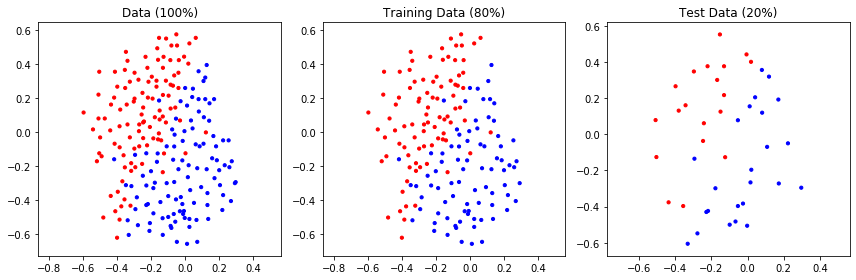

[[-0.398618    0.266082  ]
 [-0.277535   -0.548246  ]
 [ 0.297235   -0.295322  ]
 [-0.1303      0.217251  ]
 [-0.381221    0.131287  ]
 [-0.331452   -0.605556  ]
 [-0.504608   -0.125731  ]
 [-0.0535714   0.0780702 ]
 [-0.297235    0.347953  ]
 [-0.246429   -0.0365497 ]
 [-0.0668203  -0.482456  ]
 [ 0.170392    0.19269   ]
 [-0.0990783  -0.5       ]
 [-0.1303      0.376901  ]
 [-0.343318    0.160819  ]
 [ 0.10818    -0.0692982 ]
 [ 0.0806452   0.119883  ]
 [-0.14977     0.125731  ]
 [-0.294124   -0.134795  ]
 [-0.437212   -0.376316  ]
 [ 0.0190092   0.401462  ]
 [-0.168203    0.30117   ]
 [-0.0253456  -0.383041  ]
 [ 0.118548    0.319591  ]
 [-0.00230415 -0.505848  ]
 [ 0.223502   -0.0497076 ]
 [-0.241935    0.0614035 ]
 [-0.124078   -0.126608  ]
 [-0.509217    0.0789474 ]
 [-0.177995   -0.298538  ]
 [-0.228111   -0.429825  ]
 [ 0.0115207   0.154971  ]
 [-0.218894   -0.423977  ]
 [-0.356336   -0.396784  ]
 [-0.221544    0.376901  ]
 [ 0.016129   -0.266082  ]
 [ 0.0791475   0.356433  ]
 

In [11]:
X, y = read_data("custom_datasets/1/points_class_0.txt", "custom_datasets/1/points_class_1.txt")
train_X, test_X, train_Y, test_Y = generate_train_set(X,y)
plot_data(train_X, train_Y, test_X, test_Y)
print(test_X)

Wybierz dla powyższego zbioru odpowiednie parametry kernela oraz stałą uczenia, aby osiągnąć najlepszą dokładność. Wypróbuj wszystkie parametry, postaraj się zauważyć jak zmienia się wybrana hiperpłaszczyzna.

**Kernel** = wybierz jedno z: linear, poly, rbf, sigmoid

**C** = liczba rzeczywista

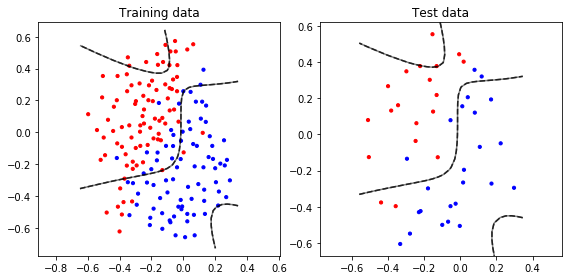

Accuracy: 0.813953488372093


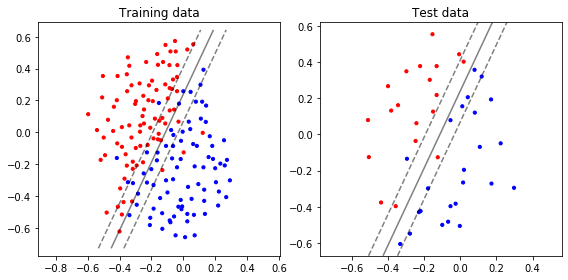

Accuracy: 0.9534883720930233


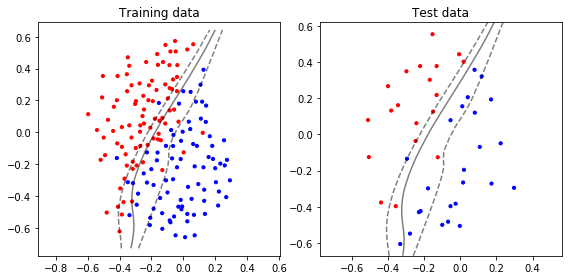

Accuracy: 0.9302325581395349


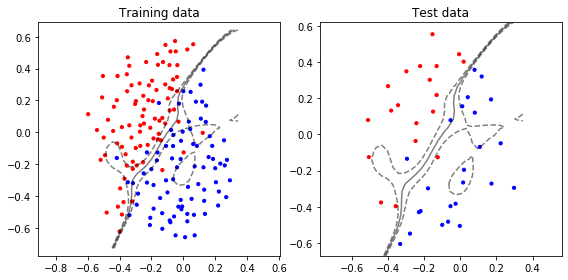

Accuracy: 0.9302325581395349


In [12]:
for i in ['sigmoid', 'linear', 'poly', 'rbf']:
    do_svm(train_X, test_X, train_Y, test_Y, kernel=i, C=9999.0)
    
# dla sigimoid ok 10-30 83%
# dla linear powyżej ok 10 nie robi robi różnicy 95%
# dla poly nie udało mi się osiągnąć więcej niż 93%
# dla rbf 

Zrób to samo co wcześniej, ale dla innego rodzaju danych

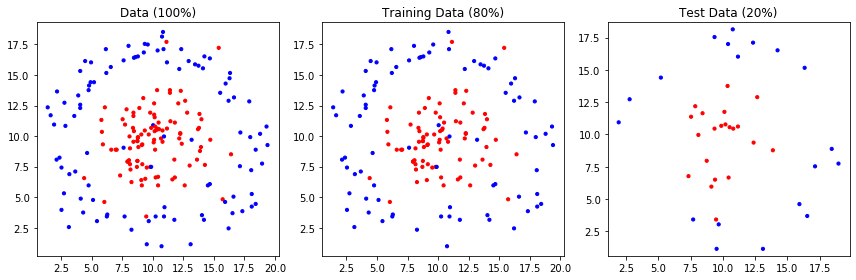

In [125]:
X, y = read_data("custom_datasets/2/points_class_0.txt", "custom_datasets/2/points_class_1.txt")
train_X, test_X, train_Y, test_Y = generate_train_set(X,y)
plot_data(train_X, train_Y, test_X, test_Y)

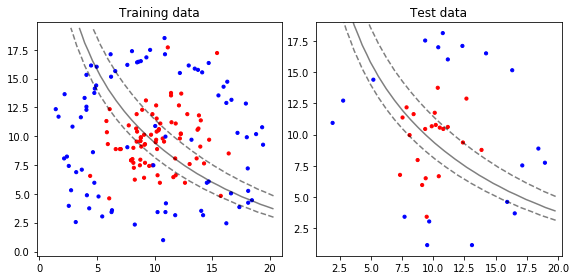

Accuracy: 0.45


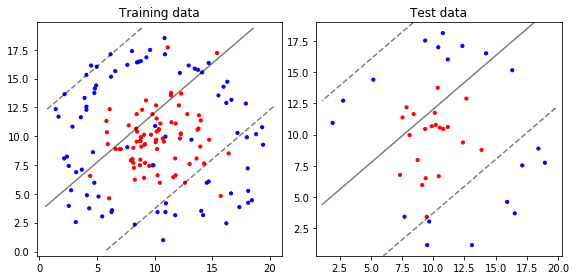

Accuracy: 0.65


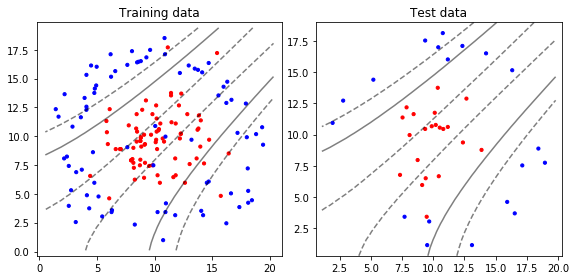

Accuracy: 0.875


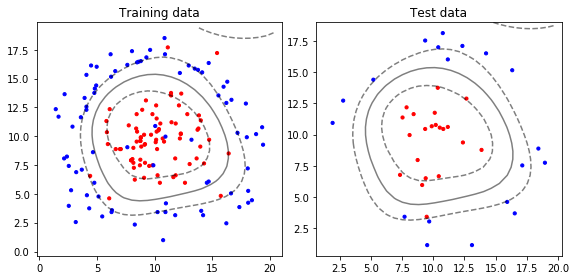

Accuracy: 0.975


In [126]:
for i in ['sigmoid', 'linear', 'poly', 'rbf']:
    do_svm(train_X, test_X, train_Y, test_Y, kernel=i, C=10.0)
    
# poly dawało 90% dokładności, natomiast linear i sigmoid
# kompletnie sobie nie radzi, najwyżej osiągnąłem 97,5% dla rbf

Wybierz dla powyższego zbioru odpowiednie parametry kernela oraz stałą uczenia, aby osiągnąć najlepszą dokładność.

Ostatni raz, zrób to samo co wcześniej, ale dla jeszcze innego rodzaju danych

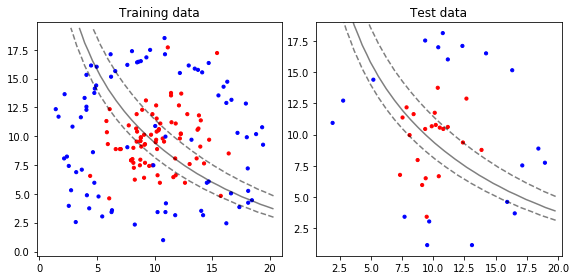

Accuracy: 0.45


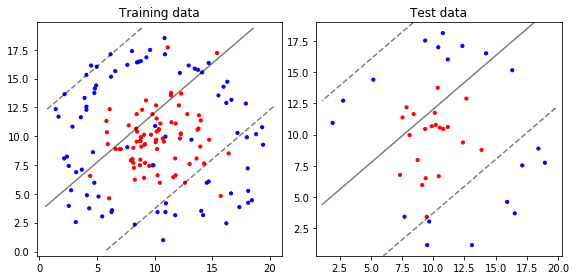

Accuracy: 0.65


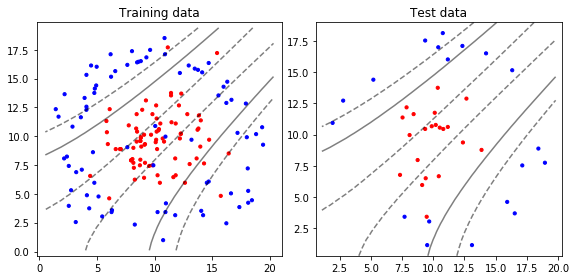

Accuracy: 0.875


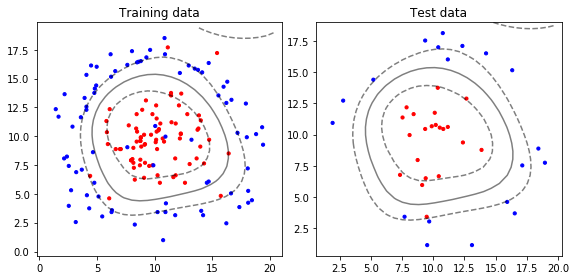

Accuracy: 0.975


In [127]:
for i in ['sigmoid', 'linear', 'poly', 'rbf']:
    do_svm(train_X, test_X, train_Y, test_Y, kernel=i, C=10.0)

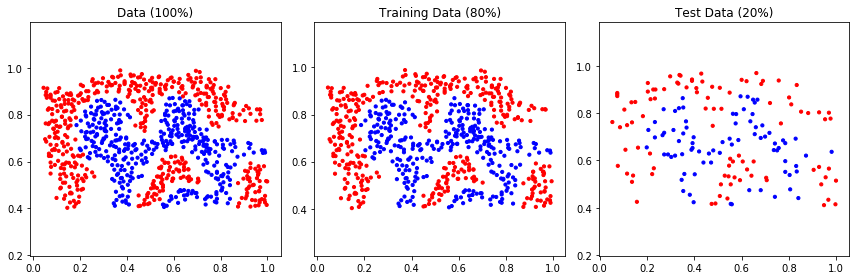

In [128]:
X, y = read_data("custom_datasets/3/points_class_0.txt", "custom_datasets/3/points_class_1.txt")
train_X, test_X, train_Y, test_Y = generate_train_set(X,y)
plot_data(train_X, train_Y, test_X, test_Y)

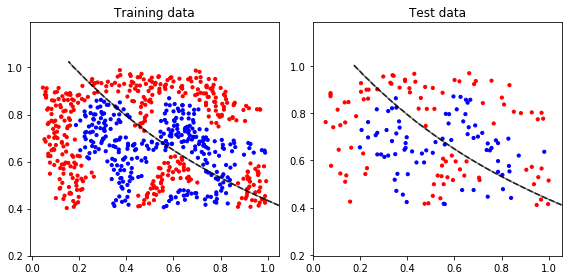

Accuracy: 0.4913294797687861


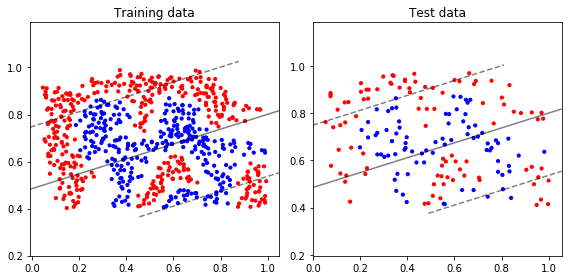

Accuracy: 0.5375722543352601


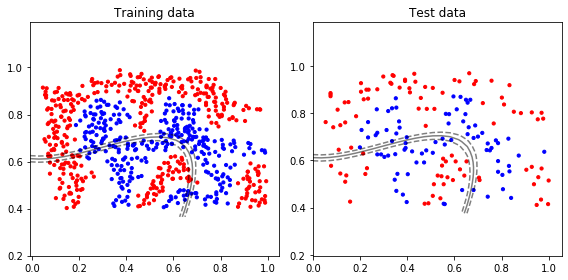

Accuracy: 0.5491329479768786


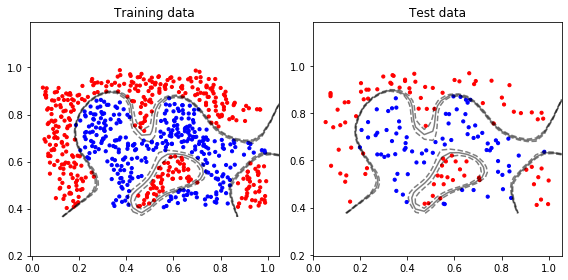

Accuracy: 0.9826589595375722


In [129]:
for i in ['sigmoid', 'linear', 'poly', 'rbf']:
    do_svm(train_X, test_X, train_Y, test_Y, kernel=i, C=100000.0)

Wybierz dla powyższego zbioru odpowiednie parametry kernela oraz stałą uczenia, aby osiągnąć najlepszą dokładność.

### 4. Omówienie accuracy, cross validation, loss, ROC curve, PR curve

Także w tej samej prezentacji: https://1drv.ms/p/s!Ap19wJ6OUb8YgYMBlXjB0sOhyxqi0Q

### 5. Wizualizacja accuracy, cross validation, loss, ROC curve, PR curve dla zbioru WBC

In [18]:
cancer = load_breast_cancer()

X, y = (cancer.data, cancer.target)

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [19]:
# accuracy:
clf = SVC(kernel='linear', probability=True)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(f'accuracy = {accuracy_score(y_test,y_pred)}')

accuracy = 0.9440559440559441


In [20]:
#cross validation
scores = cross_val_score(clf, X, y, cv=5)
print(f'cross validations scores:{scores}')

cross validations scores:[0.94736842 0.92982456 0.97368421 0.92105263 0.95575221]


In [21]:
#loss użyto funkcji hinge która jest stosowana w SVM
print(f'hinge function loss: {hinge_loss(y_test, y_pred)}')

hinge function loss: 0.3986013986013986


In [22]:
# precision score
print(f'precision score: {precision_score(y_test, y_pred)}')

precision score: 0.967391304347826


In [23]:
# recall score
print(f'recall score: {recall_score(y_test, y_pred)}')

recall score: 0.9468085106382979


In [24]:
# f1 score
print(f'f1 score: {f1_score(y_test, y_pred)}')

f1 score: 0.956989247311828


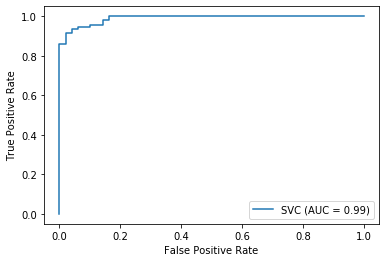

In [25]:
# ROC curve
# Binarize the output
svc_disp = plot_roc_curve(clf, x_test, y_test)
plt.show()

Average precision score, micro-averaged over all classes: 0.98


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.98')

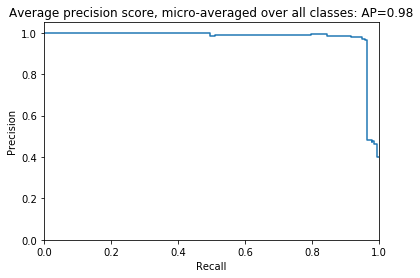

In [26]:
# PR_curve
y_binarized = label_binarize(y, classes=[0, 1, 2])
n_classes = y_binarized.shape[1]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, y_binarized, train_size=0.75)

# Run classifier
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

### 5. Zadania

a. Na zbiorach MNIST, FMNIST, TNG (twenty news groups) zaprezentować działanie
klasyfikatora SVM i wyniki porównać do klasyfikatora k-NN przy pomocy poznanych miar
walidacji klasyfikacji. (dla najlepszej konfiguracji, stałej uczenia, funkcji kernela)

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

mnist = fetch_openml("mnist_784", data_home="./mnist_784", cache=True)

fmnist = fetch_openml("Fashion-MNIST", data_home="./fmnist", cache=True)

tng = fetch_20newsgroups()

In [3]:
data_size = 400

mnist_zipped = list(zip(mnist.data, mnist.target))
mnist_random_sample = random.sample(mnist_zipped, data_size)

fmnist_zipped = list(zip(fmnist.data, fmnist.target))
fmnist_random_sample = random.sample(fmnist_zipped, data_size)

tng_zipped = list(zip(tng.data, tng.target))
tng_random_sample = random.sample(tng_zipped, data_size)

data = [mnist_random_sample, fmnist_random_sample, tng_random_sample]
data_names = ["MNIST", "FMINST", "TNG"]

NameError: name 'mnist' is not defined

In [134]:
def image_mnist(data):
    data = [i for i in data]
    img = np.zeros((28,28), dtype=np.uint8)
    for x in range(28):
        for y in range(28):
            img[y][x]=data[y*28+x]
    return img

def array_mnist(img):
    return [img[i][j] for i in range(28) for j in range(28)]

def classifier_test(x_train, y_train, x_test, y_test, classifier, classifier_name, data_name, stats):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    stats[data_name][classifier_name] = {}
    stats[data_name][classifier_name]['accuracy'] = accuracy_score(y_test, y_pred)
    stats[data_name][classifier_name]['cross'] = cross_val_score(clf, X, y, cv=5)
    stats[data_name][classifier_name]['precision'] = precision_score(y_test, y_pred, average='macro')
    stats[data_name][classifier_name]['recall'] = recall_score(y_test, y_pred, average='macro')
    stats[data_name][classifier_name]['f1'] = f1_score(y_test, y_pred, average='macro')
    
def data_test(X, Y, data_name):
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    stats[data_name] = {}
    for j in ['sigmoid', 'linear', 'poly', 'rbf']:
        classifier_test(x_train, y_train, x_test, y_test, SVC(kernel=j, C=C), j, data_name, stats)
    classifier_test(x_train, y_train, x_test, y_test, knn, 'knn', data_name, stats)
    
    # augumentacja
    seq = iaa.Sequential([
        iaa.Sometimes(1.0,iaa.GaussianBlur(sigma=(0.5, 0.7))),
        iaa.Affine(rotate=(-10, 10)),
    ])
    
    if data_name == 'MNIST':
        test_images = [image_mnist(i) for i in x_train]
        x_train = [i.reshape(784) for i in seq(images=test_images)]
        
        stats_aug[data_name] = {}
        for j in ['sigmoid', 'linear', 'poly', 'rbf']:
            classifier_test(x_train, y_train, x_test, y_test, SVC(kernel=j, C=C), j, data_name, stats_aug)
        classifier_test(x_train, y_train, x_test, y_test, knn, 'knn', data_name, stats_aug)
    

    
def data_test_tng(X, Y):
    stemmer = WordNetLemmatizer()
    documents = []
    for sen in range(0, len(X)):
        document = re.sub(r'\W', ' ', str(X[sen]))
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
        document = re.sub(r'\s+', ' ', document, flags=re.I)
        document = re.sub(r'^b\s+', '', document)
        document = document.lower()
        document = document.split()
        document = [stemmer.lemmatize(word) for word in document]
        document = ' '.join(document)
        documents.append(document)
    
    vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
    X = vectorizer.fit_transform(documents).toarray()
    tfidfconverter = TfidfTransformer()
    X = tfidfconverter.fit_transform(X).toarray()
    data_test(X, Y, 'TNG')
    
def show_result_plot(data_stat):
    for i in range(len(data_stat)):
        for j in ['accuracy', 'precision', 'recall', 'f1']:
            xs = []
            ys = []
            for c in ['sigmoid', 'linear', 'poly', 'rbf', 'knn']:
                xs.append(data_stat[data_names[i]][c][j])
                ys.append(c)
            plt.plot(ys, xs, label = j)
            plt.title(data_names[i])
            plt.xlabel('classificator') 
        plt.legend()
        plt.show()

In [135]:
C = 10
knn = KNeighborsClassifier(n_neighbors=4)

stats = {}
stats_aug = {}

for i in range(3):
    X, y = zip(*(data[i]))
    if (i == 2):
        data_test_tng(X, y)
    else: 
        data_test(X, y, data_names[i])

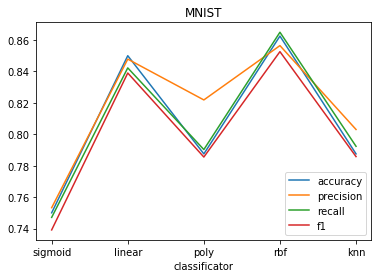

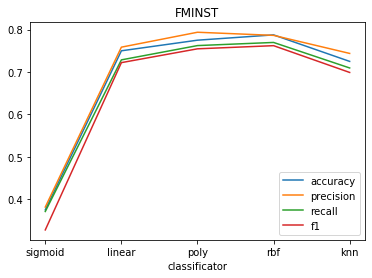

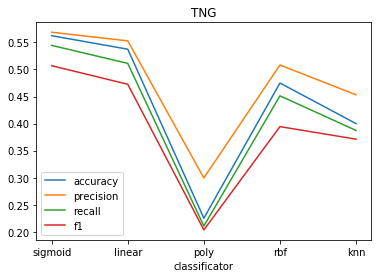

In [136]:
show_result_plot(stats)

b. Zaproponować, taką augmentację zbiorów treningowych (wielkość zbioru zależna od
mocy obliczeniowej którą Państwo dysponują) aby uzyskać jak najlepsze miary jakości na
zbiorach testowych.

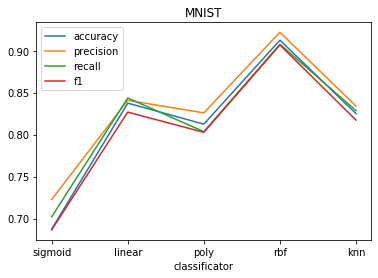

In [137]:
show_result_plot(stats_aug)